# The Hydrogen Atom

## Motivation:

We would like to know how the particle-wave duality hypothesis affects the structure and behavior of atoms and molecules.  The simplest case is that of the hydrogen atom, containing only a single electron and a single proton.

## Learning Goals:

After working through these notes, you will be able to:

1. Write out the Hamiltonian for the hydrogen atom (or at least one approximation of the hydrogen atom)
2. Perform a separation of variables on the hydrogen atom Hamiltonian (to separate $r$ from $\theta$ and $\phi$).
3. Identify the $\theta$ and $\phi$ wave functions as the spherical harmonics.
4. Identify the $r$ wave functions as related to the Laguerre polynomials.
5. Properties of Laguerre polynomials.

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Model of the Hydrogen Atom

The hydrogen atom is composed of an electron and a proton.  If these two particles were classical, the interaction energy would simply be described by the Coulombic attraction between the two particles

$V(r) = -\frac{e^2}{4\pi\epsilon_0r}$,

where $r$ is the separation distance between the two particles, $e$ is the charge of an electron and $\epsilon_0$ is the permittivity of free space. In the quantum mechanical picture, we will treat this same function as the potential energy operator.  The Hamiltonian for a hydrogen atom is then, including the kinetic energy,

$\hat{H} = -\frac{\hbar^2}{2m_e}\nabla^2-\frac{e^2}{4\pi\epsilon_0r}$

where $m_e$ is the mass of an electron and $\nabla^2$ is the Laplacian in three dimensions.  Notice that this Hamiltonian is only in terms of the coordinates of the electron relative to the heavy proton.  

## Solving the Schrodinger Equation by Separating Variables

Since the potential is a function of $r$, the separation distance between the proton and the electron, it is useful to write the Laplacian in spherical coordinates. Recall from the rigid rotator that

$\nabla^2_{r\theta\phi} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}$

Plugging this back into the Schrodinger equation yields

$\hat{H}\Psi(r,\theta,\phi) = -\frac{\hbar^2}{2m_e}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\psi(r,\theta,\phi) +V(r)\psi(r,\theta,\phi) = E\psi(r,\theta,\phi)$ 

Multiply through by $2m_er^2$ to get

$-\hbar^2\left[\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\psi(r,\theta,\phi) +2m_er^2V(r)\psi(r,\theta,\phi) = 2m_er^2E\psi(r,\theta,\phi)$

Rearrange (combine terms dependent on $r$) to get

$-\hbar^2\left[\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\psi(r,\theta,\phi) -\hbar^2\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)\psi(r,\theta,\phi)+2m_er^2\left(V(r)-E\right)\psi(r,\theta,\phi) =0$

Notice that the left-hand term in the above equality is the $\hat{L}^2\psi$ thus yielding

$\hat{L}^2\psi(r,\theta,\phi) -\hbar^2\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)\psi(r,\theta,\phi)+2m_er^2\left(V(r)-E\right)\psi(r,\theta,\phi) =0$.

Now notice that only the left-hand term depends on $\theta$ and $\phi$ and only the two right-hand terms depend on $r$ thus allowing us to write

$\psi(r,\theta,\phi) = R(r)Y(\theta,\phi)$,

where

$\hat{L}^2Y(\theta,\phi) = \alpha Y(\theta,\phi) \tag{1}$

and 

$-\frac{\hbar^2}{2m_er^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)+\left[\frac{\alpha}{2m_er^2} + V(r)-E\right]R(r) =0 \tag{2} $.

## Solutions to the $\theta$ and $\phi$ Equation: The Spherical Harmonics

We know the solutions $\hat{L}^2$ equation to be the spherical harmonics.  Namely

$\hat{L}^2Y(\theta,\phi) = \hbar^2l(l+1)Y_l^{m}(\theta,\phi)$

for $l=0,1,2...$ and $-l\leq m \leq l$.  $Y_l^{m}(\theta,\phi)$ are the spherical harmonics where it is customary to write them in terms of $l$ and $m$ for the hydrogen atom.  This yields that

$\alpha = \hbar^2l(l+1)$.

In these notes we will include the normalization constants of each component with the respective function.  That is we define our spherical harmonics as

\begin{equation}
Y_l^{m} = \sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(\cos\theta)e^{im\phi}
\end{equation}

Below are 3D representations of some of the spherical harmonics.

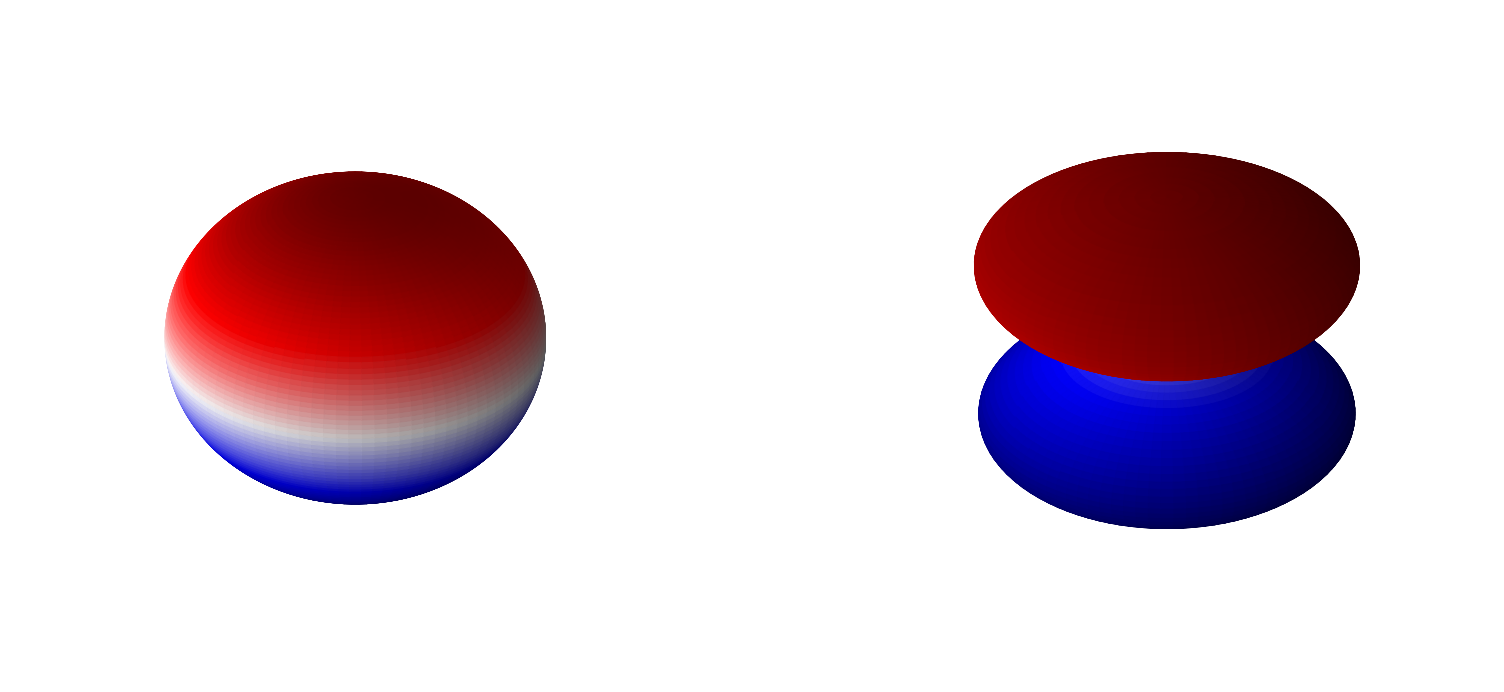

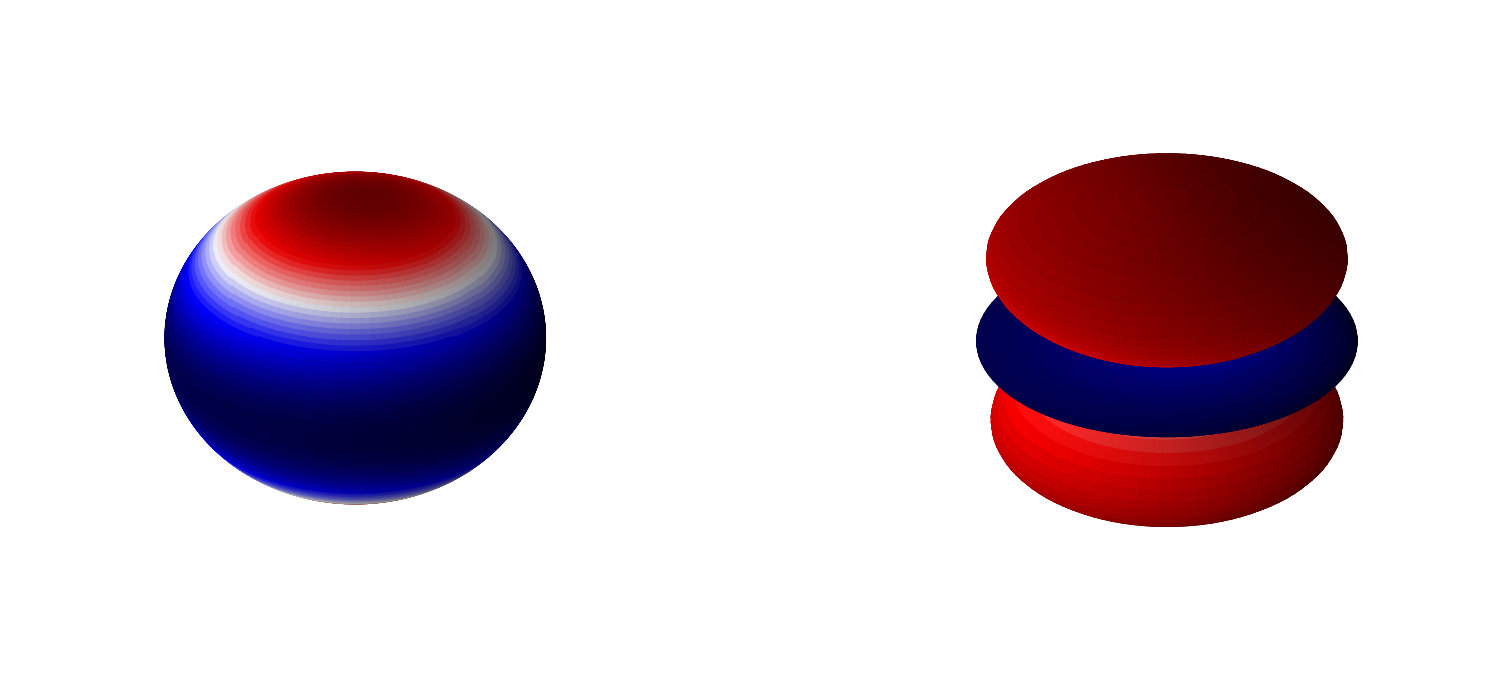

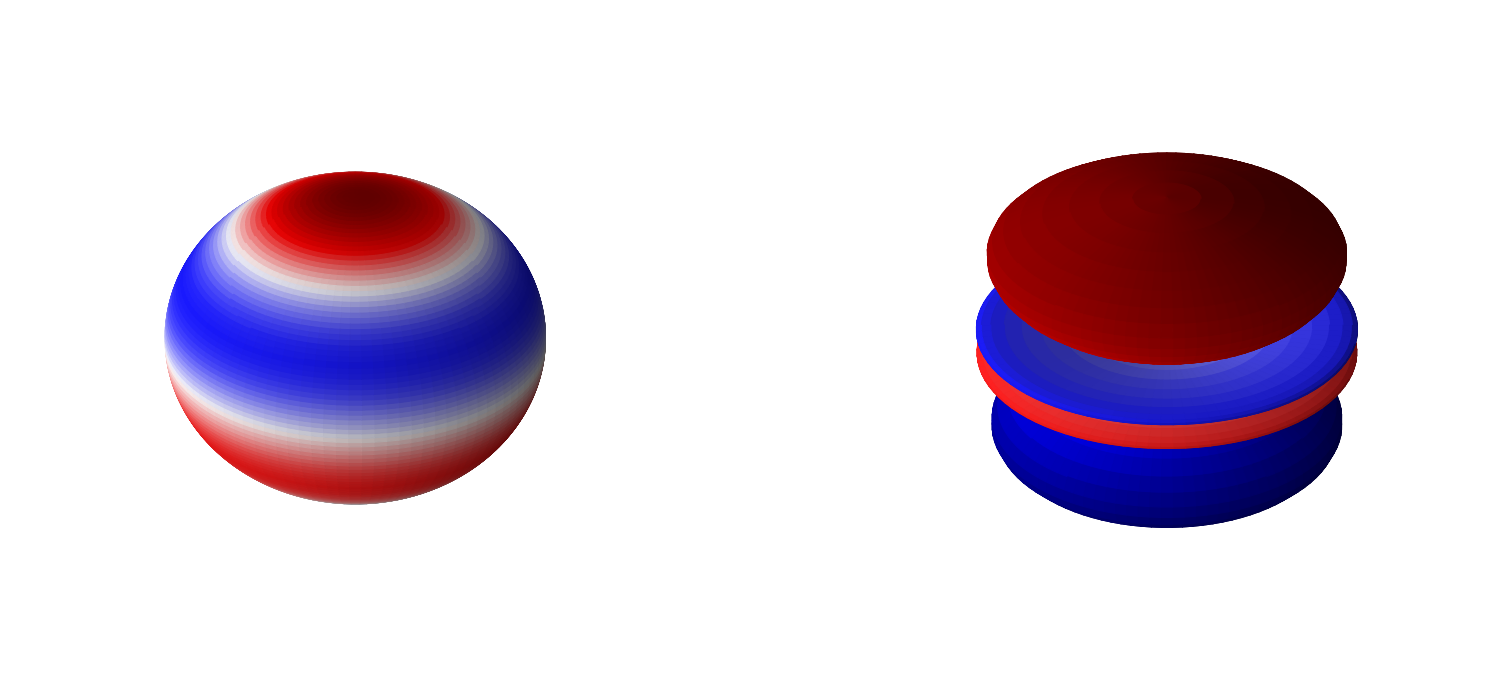

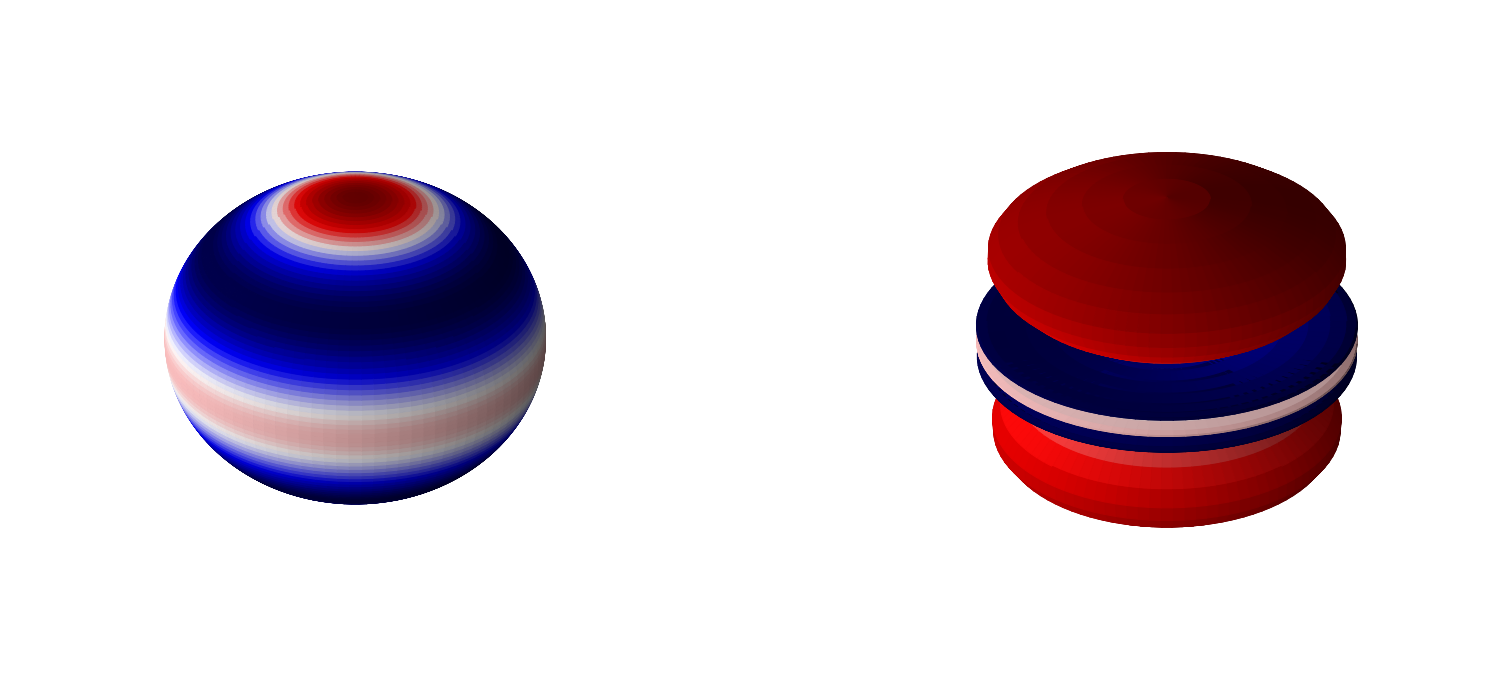

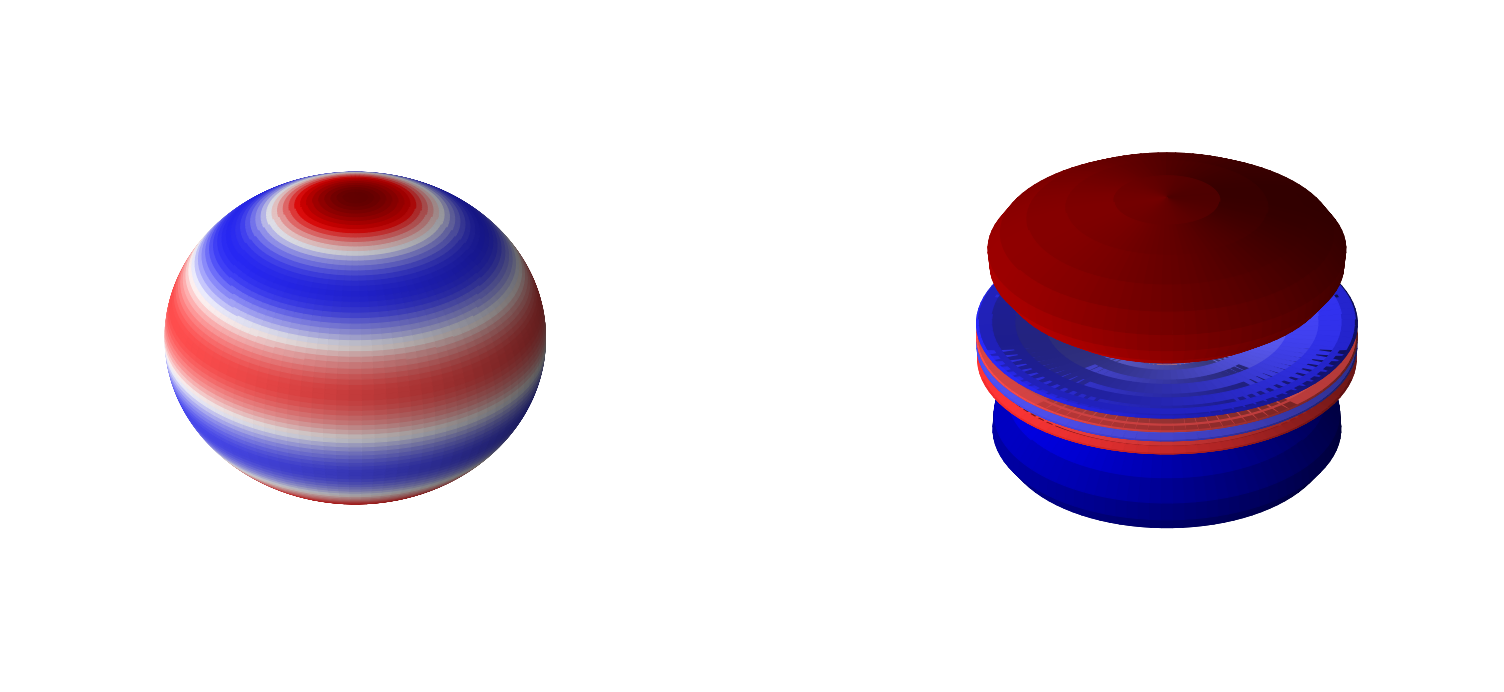

In [1]:
# recall what the spherical harmonics look like
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import sph_harm
def plot_spherical_harmonic(m,l,theta=np.linspace(0,np.pi,100),phi=np.linspace(0,2*np.pi,100)):
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, PHI, THETA).real
    s = np.power(sph_harm(m, l, PHI, THETA).real,2)
    s /= s.max()
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
    

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=(24,12),dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.set_axis_off()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X*s, Y*s, Z*s,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    # Turn off the axis planes
    ax.set_axis_off()

plot_spherical_harmonic(0,1)
plot_spherical_harmonic(0,2)
plot_spherical_harmonic(0,3)
plot_spherical_harmonic(0,4)
plot_spherical_harmonic(0,5)
plt.show();

## Solutions to the $r$ Equation: The Generalized Laguerre Polynomials

We must now substitute $\alpha=\hbar^2l(l+1)$ into equation (2) above and solve for the radial part

$-\frac{\hbar^2}{2m_er^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)+\left[\frac{\hbar^2l(l+1)}{2m_er^2} + V(r)-E\right]R(r) =0 $.

This can be solved using power series solutions to differential equations but we will not go through it. Instead we will present the energies and wavefunctions

$E_n = - \frac{m_ee^4}{8\epsilon_0^2h^2n^2} = - \frac{e^2}{8\pi\epsilon_0a_0n^2}$

for $n=1,2,...$ and $a_0 = \frac{\epsilon_0h^2}{\pi m_ee^2}$ is the Bohr radius.  These are actually the same energies obtained from the Bohr model of the hydrogen atom.  Also notice that the energies are independent of $l$.  It should be noted that $n\geq l+1 $ or $0 \leq l \leq n-1$ for $n=1,2,..$.  

The radial wavefunction solution to the equation above is given as 

$R_{nl} = A_r r^le^{-r/na_0}L_{n+l}^{2l+1}\left( \frac{2r}{na_0}\right)$,

where $L_{n+l}^{2l+1}$ are the *associated Laguerre polynomials*. The $A_r$ factor is the normalization factor that can be determined by requiring
\begin{equation}
\int_0^\infty R_{nl}^*R_{nl}r^2dr = 1,
\end{equation}
This requirement yields
\begin{equation}
A_r = -\left[ \frac{(n-l-1)!}{2n[(n+l)!]^3}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2}
\end{equation}


Below we will plot these functions in terms of the  *generalized Laguerre polynomials* which requires us to replace $L_{n+l}^{2l+1}$  in the above equation with $L_{n-l-1}^{2l+1}$ (this is now the generalized form) and remove a factor of $(n+l)!$:

$R_{nl} = -\left[ \frac{(n-l-1)!}{2n(n+l)!}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n-l-1}^{2l+1}\left( \frac{2r}{na_0}\right)$.

Below is a plot of the first few $R_{nl}$ functions.  

No handles with labels found to put in legend.


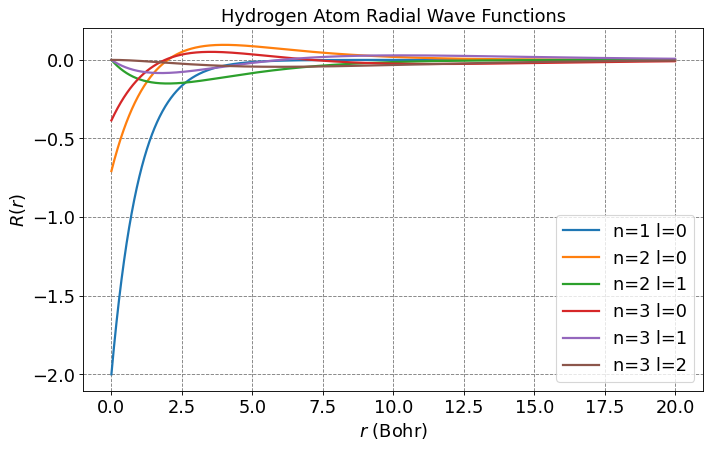

In [2]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
fontsize = 16
plt.figure(figsize=(10,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=fontsize)
plt.grid(which='major', axis='both', color='#808080', linestyle='--')
plt.title("Hydrogen Atom Radial Wave Functions",fontsize=fontsize)
plt.legend(fontsize=fontsize);
# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,20,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        plt.plot(r,R,label=label,lw=2)
plt.legend(fontsize=fontsize)
plt.xlabel(r'$r$ (Bohr)',size=fontsize)
plt.ylabel(r'$R(r)$',size=fontsize)
plt.show();

### Properties of the General Laguerre Polynomials

The radial wave function of the hydrogen atom contains a normalization factor and then three different functions of $r$:

$R_{nl}(r) \propto r^le^{-r/na_0}L_{n+1}^{2l+1}\left( \frac{2r}{na_0}\right)$.

Of these, the generalized Laguerre polynomials, $L_{n+1}^{2l+1}\left( \frac{2r}{na_0}\right)$, are relatively unknown to us but have some important (/useful) properties.  Before we get into them, here are a few of the first Laguerre polynomials:

|   $n, l$       | $L_n^{(\alpha)}(x)$ |
| :---------- | :---------------- |
| $1, 0$           | $L_1^1(x)= -1$ |
| $2, 0$          | $L_2^1(x)= -2(2-x)$ |
| $2, 1$            | $L_3^3(x)= -3!$ |
| $3, 0$          | $L_3^1(x)= -3!(3-3x+\frac{1}{2}x^2)$ |
| $3, 1$            | $L_4^3(x)= -4!(4-x)$ |
| $3, 2$          | $L_5^5(x)= -5!$ |


A plot of the generalized Laguerre polynomials is provided below.

There are two important properties of these functions that we will consider: (1) Differentiation and (2) Orthogonality.

***Differentiation*** 

The generalized Laguerre polynomials have the following property when differentiated:

\begin{equation}
\frac{d^k}{dx^k} L_n^{(\alpha)}(x) = \begin{cases} (-1)^kL_{n-k}^{(\alpha+k)}(x)\quad\text{ if } k\leq n \\0 \qquad\qquad\qquad\text{ otherwise}\end{cases}
\end{equation}

***Orthogonality*** 

The generalized Laguerre polynomials hare not orthogonal themselves but are orthogonal over $[0,\infty)$ with weighting function $x^\alpha e^{-x}$.  That is

\begin{equation}
\int_0^\infty x^\alpha e^{-x} L_n^{(\alpha)}(x)L_m^{(\alpha)}(x)dx = \frac{\Gamma(n+\alpha+1)}{n!}\delta_{n,m}
\end{equation}

where $\Gamma$ is the gamma function and $\delta_{n,m}$ is defined by
\begin{equation}
\delta_{n,m} = \begin{cases} 1 \quad\text{ if }n=m \\ 0 \quad\text{ otherwise}\end{cases}
\end{equation}

That particular orthogonality condition is not that useful for us but it can also be shown that
\begin{equation}
\int_0^\infty x^{(\alpha+1)} e^{-x} L_n^{(\alpha)}(x)L_m^{(\alpha)}(x)dx = \frac{2n[(n+\frac{\alpha-1}{2})!]^3}{(n-\frac{(\alpha-1)}{2}-1)!}\delta_{n,m}
\end{equation}

This relationship indicates that any two hydrogen atom wave functions differing in primary quantum number $n$ will be orthogonal.

A related integral is also useful
\begin{equation}
\int_0^\infty x^{\alpha+1}e^{-x}\left[ L_n^{(\alpha)}(x)\right]^2dx = \frac{(n+\alpha)!}{n!}(2n+\alpha + 1)
\end{equation}

## The Complete Solution

The complete hydrogen atom wavefunctions are a product of the radial and angular components

$\psi_{nlm_l}(r,\theta,\phi) = R_{nl}(r)Y_l^{m_l}(\theta,\phi)$

In [3]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_wf(r,theta,phi,n,l,m):
    Y_norm = np.sqrt((2*l+1)*factorial(l-np.abs(m))/(4*np.pi*factorial(l+np.abs(m))))
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return Y_norm*sph_harm(m, l, phi, theta).real*R

def plot_hydrogen_atom_wf(n,l,m, ax_obj, r=np.linspace(0,10,100), theta=np.linspace(0,np.pi,20), phi=np.linspace(0,1.5*np.pi,25)):
    R, THETA, PHI = np.meshgrid(r, theta, phi)
    R = R.flatten()
    THETA = THETA.flatten()
    PHI = PHI.flatten()
    x = R*np.sin(THETA)*np.cos(PHI) 
    y = R*np.sin(THETA)*np.sin(PHI)
    z = R*np.cos(THETA)
    wf = hydrogen_atom_wf(R,THETA,PHI,n,l,m)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    ax_obj.scatter3D(x,y,z,c=wf, cmap='RdBu', vmin=vmin, vmax=vmax,alpha=0.25)
    ax_obj.set_box_aspect((100,100,100))
    #ax_obj.set_axis_off()
    ax_obj.axes.xaxis.set_ticklabels([])
    ax_obj.axes.yaxis.set_ticklabels([])
    ax_obj.axes.zaxis.set_ticklabels([])
    
def plot_hydrogen_atom_wf_xz_projection(n,l,m, ax_obj):
    x = np.linspace(-10,10,1000)
    z = np.linspace(-10,10,1000)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    wf = hydrogen_atom_wf(R,THETA,PHI,n,l,m)
    wf = wf.reshape(X.shape)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=vmin, vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-10, 10, -10, 10])
    ax_obj.set_aspect('equal')
    #ax_obj.set_axis_off()
    return c

def plot_particle_in_sphere_wf_xy_projection(n,l,m, ax_obj):
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = np.zeros(100)
    X, Y= np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    indeces = np.argwhere(R <= 1)
    wf[indeces] = particle_in_sphere_wf(R[indeces],THETA[indeces],PHI[indeces],n,l,m)
    wf = wf.reshape(X.shape)
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Y, wf, cmap='RdBu', vmin=-0.2, vmax=0.2)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-1, 1, -1, 1])
    ax_obj.set_aspect('equal')
    ax_obj.set_axis_off()
    return c

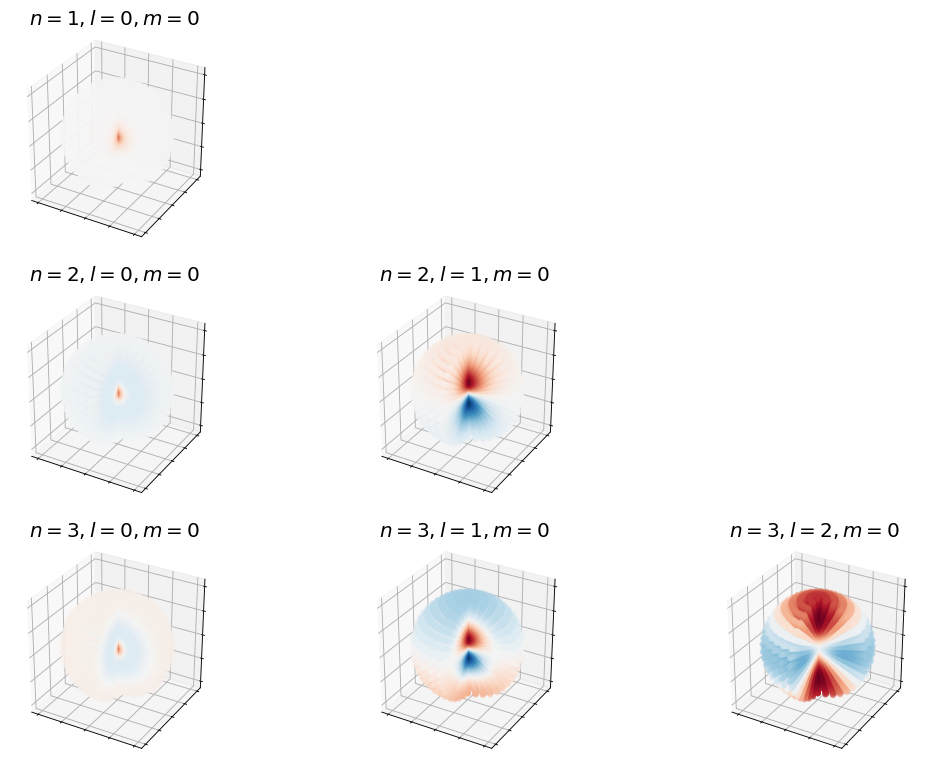

In [4]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k',subplot_kw={'projection': '3d'}) 
for n in range(1,4):
    for l in range(3):
        if l < n:
            plot_hydrogen_atom_wf(n,l,0,ax[n-1,l])
        else: 
            ax[n-1,l].set_axis_off()
plt.show();

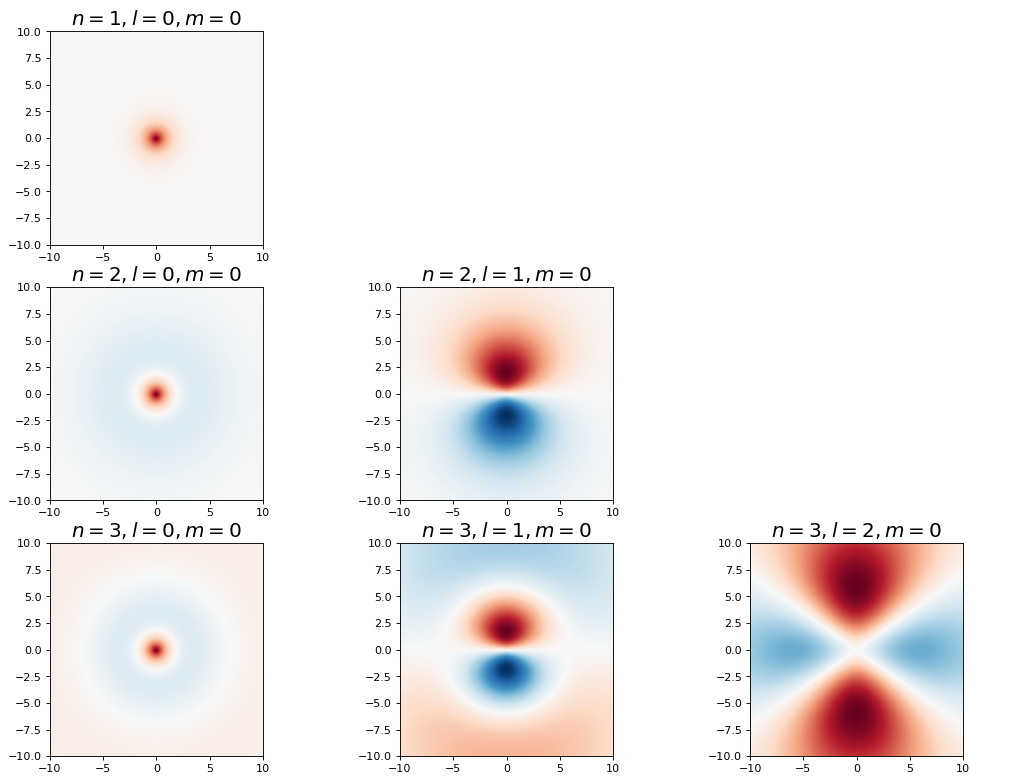

In [5]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k') 
for n in range(1,4):
    for l in range(3):
        if l < n:
            plot_hydrogen_atom_wf_xz_projection(n,l,0,ax[n-1,l])
        else: 
            ax[n-1,l].set_axis_off()
plt.show();